In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

# 실습 코드

#### 빈 부분을 채워 Hotel_data로 Growth Curve Model을 만들어 주세요 (tiem-series1-3 참고)

In [2]:
hotel_data = pd.read_csv('./dataset/example-hotel-rooms.csv')
hotel_data = hotel_data.iloc[:12]
hotel_data.head(5)

,t,y
0,1,501
1,2,488
2,3,504
3,4,578
4,5,545


In [3]:
hotel_data['log_y'] = np.log(hotel_data['y'])
hotel_data.head(5)

,t,y,log_y
0,1,501,6.216606
1,2,488,6.190315
2,3,504,6.222576
3,4,578,6.359574
4,5,545,6.300786


In [4]:
hotel_model = ols('log_y ~ t', data=hotel_data).fit()
hotel_model.summary()

C:\Users\InsungBaek\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.3356
Date:                Tue, 11 Jan 2022   Prob (F-statistic):              0.575
Time:                        19:04:11   Log-Likelihood:                 7.0740
No. Observations:                  12   AIC:                            -10.15
Df Residuals:                      10   BIC:                            -9.178
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2894      0.090     69.515      0.000       6.088       6.491
t              0.0071      0.012      0.579      0.575      -0.020       0.035
==============================================================================
Omnibus:                        1.610   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.137
Skew:                           0.688   Prob(JB):                        0.566
Kurtosis:                       2.383   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

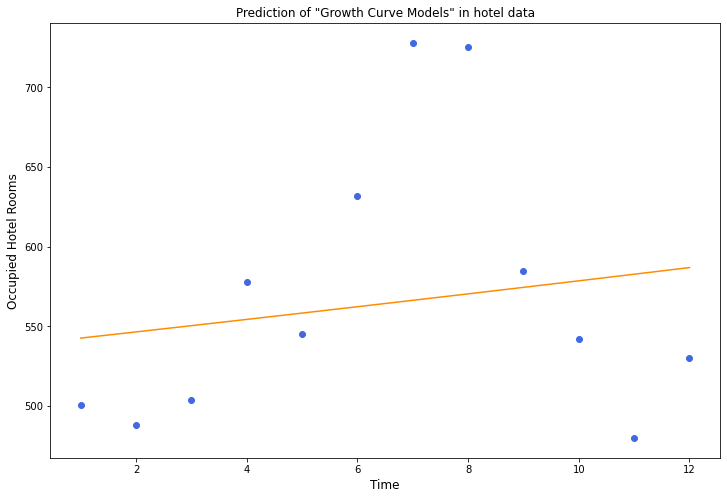

In [5]:
pred_hotel = hotel_model.predict(hotel_data['t'])
pred_hotel = np.exp(pred_hotel)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue')
plt.plot(hotel_data['t'], pred_hotel, color='darkorange')
plt.title('Prediction of "Growth Curve Models" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel Rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

#### 빈 부분을 채워 Airline_data로 Binary variable Model을 만들어주세요 (tiem-series1-3 참고)

In [6]:
airline_data = pd.read_csv('./dataset/international-airline-passengers.csv')
airline_data.rename(columns={airline_data.columns[1]: 'passengers'}, inplace=True)
airline_data.dropna(inplace=True)
airline_data['t'] = airline_data.index+1
airline_data['m'] = airline_data['t'] % 12
airline_data.head(5)

,Month,passengers,t,m
0,1949-01,112.0,1,1
1,1949-02,118.0,2,2
2,1949-03,132.0,3,3
3,1949-04,129.0,4,4
4,1949-05,121.0,5,5


In [7]:
airline_dummy = pd.get_dummies(airline_data['m'], drop_first=True)
airline_dummy.rename(columns = lambda x: "m" + str(x), inplace=True)
airline_dummy

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,0,1,0,0,0
140,0,0,0,0,0,0,0,0,1,0,0
141,0,0,0,0,0,0,0,0,0,1,0
142,0,0,0,0,0,0,0,0,0,0,1


In [8]:
binary_airline_data = pd.concat([airline_data, airline_dummy], axis=1)
binary_airline_data['log_passengers'] = np.log(binary_airline_data['passengers'])
binary_airline_data

,Month,passengers,t,m,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,log_passengers
0,1949-01,112.0,1,1,1,0,0,0,0,0,0,0,0,0,0,4.718499
1,1949-02,118.0,2,2,0,1,0,0,0,0,0,0,0,0,0,4.770685
2,1949-03,132.0,3,3,0,0,1,0,0,0,0,0,0,0,0,4.882802
3,1949-04,129.0,4,4,0,0,0,1,0,0,0,0,0,0,0,4.859812
4,1949-05,121.0,5,5,0,0,0,0,1,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08,606.0,140,8,0,0,0,0,0,0,0,1,0,0,0,6.406880
140,1960-09,508.0,141,9,0,0,0,0,0,0,0,0,1,0,0,6.230481
141,1960-10,461.0,142,10,0,0,0,0,0,0,0,0,0,1,0,6.133398
142,1960-11,390.0,143,11,0,0,0,0,0,0,0,0,0,0,1,5.966147


In [9]:
binary_airline_model = ols('log_passengers ~ t+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11', data=binary_airline_data).fit()
binary_airline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.31e-110
Time:                        19:04:11   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7055      0.019    241.491      0.000       4.667       4.744
t              0.0101      0.000     84.399      0.000       0.010       0.010
m1             0.0213      0.024      0.879      0.381      -0.027       0.069
m2            -0.0007      0.024     -0.030      0.976      -0.049       0.047
m3             0.1295      0.024      5.343      0.000       0.082       0.177
m4             0.0982      0.024      4.054      0.000       0.050       0.146
m5             0.0959      0.024      3.957      0.000       0.048       0.144
m6             0.2180      0.024      9.000      0.000       0.170       0.266
m7             0.3219      0.024     13.293      0.000       0.274       0.370
m8             0.3126      0.024     12.911      0.000       0.265       0.361
m9             0.1680      0.024      6.939      0.000       0.120       0.216
m10            0.0299      0.024      1.233      0.220      -0.018       0.078
m11           -0.1139      0.024     -4.703      0.000      -0.162      -0.066
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.412
Skew:                          -0.224   Prob(JB):                        0.299
Kurtosis:                       2.551   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

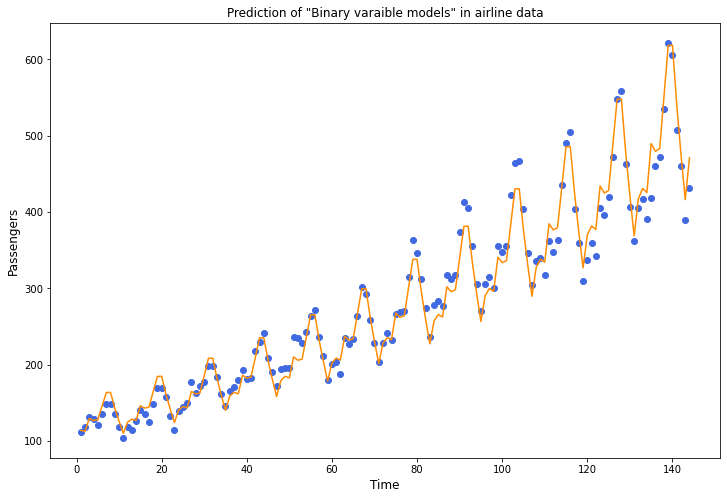

In [10]:
pred_columns = binary_airline_data.drop(['passengers', 'Month', 'm'], axis=1).columns
pred_binary_airline = binary_airline_model.predict(binary_airline_data[pred_columns])
pred_binary_airline = np.exp(pred_binary_airline)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(binary_airline_data['t'], binary_airline_data['passengers'], color='royalblue')
plt.plot(binary_airline_data['t'], pred_binary_airline, color='darkorange')
plt.title('Prediction of "Binary varaible models" in airline data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Passengers', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

#### 빈 부분을 채워 Airline_data로 Trigonometric Model (2)을 만들어주세요 (tiem-series1-3 참고)

In [11]:
# make variables in trigonometric model 
# if standard is month, time_stand=12, if standard is day, time_stand=365 
time_stand = 12
airline_data['sintwo'] = np.sin(2*np.pi*airline_data['t'] / time_stand)
airline_data['costwo'] = np.cos(2*np.pi*airline_data['t'] / time_stand)
airline_data['sinfour'] = np.sin(4*np.pi*airline_data['t'] / time_stand)
airline_data['cosfour'] = np.cos(4*np.pi*airline_data['t'] / time_stand)
airline_data['log_passengers'] = np.log(airline_data['passengers'])

airline_data.head(5)

,Month,passengers,t,m,sintwo,costwo,sinfour,cosfour,log_passengers
0,1949-01,112.0,1,1,0.500000,8.660254e-01,8.660254e-01,0.5,4.718499
1,1949-02,118.0,2,2,0.866025,5.000000e-01,8.660254e-01,-0.5,4.770685
2,1949-03,132.0,3,3,1.000000,6.123234e-17,1.224647e-16,-1.0,4.882802
3,1949-04,129.0,4,4,0.866025,-5.000000e-01,-8.660254e-01,-0.5,4.859812
4,1949-05,121.0,5,5,0.500000,-8.660254e-01,-8.660254e-01,0.5,4.795791


In [12]:
tri_airline_model_2 = ols('log_passengers ~ t+sintwo+costwo+sinfour+cosfour', data=airline_data).fit()
tri_airline_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.03e-111
Time:                        19:04:12   Log-Likelihood:                 185.79
No. Observations:                 144   AIC:                            -359.6
Df Residuals:                     138   BIC:                            -341.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8112      0.011    421.262      0.000       4.789       4.834
t              0.0101      0.000     73.725      0.000       0.010       0.010
sintwo        -0.0493      0.008     -6.138      0.000      -0.065      -0.033
costwo        -0.1418      0.008    -17.687      0.000      -0.158      -0.126
sinfour        0.0787      0.008      9.812      0.000       0.063       0.095
cosfour       -0.0228      0.008     -2.847      0.005      -0.039      -0.007
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.908
Skew:                          -0.193   Prob(JB):                        0.635
Kurtosis:                       2.959   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

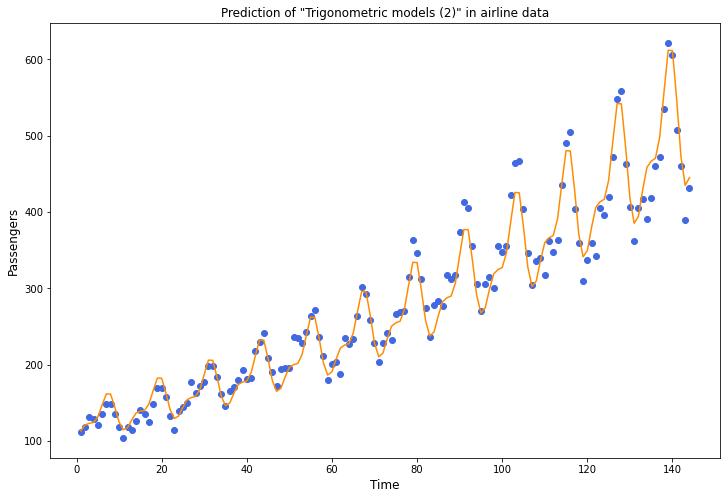

In [13]:
pred_columns_tri_2 = airline_data.drop(['m', 'Month', 'passengers'], axis=1).columns
pred_tri_2_airline = tri_airline_model_2.predict(airline_data[pred_columns_tri_2])
pred_tri_2_airline = np.exp(pred_tri_2_airline)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(airline_data['t'], airline_data['passengers'], color='royalblue')
plt.plot(airline_data['t'], pred_tri_2_airline, color='darkorange')
plt.title('Prediction of "Trigonometric models (2)" in airline data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Passengers', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

#### Airline_data로 binary model, Trigonometric Model (2)을 비교해주세요 (tiem-series1-3 참고)

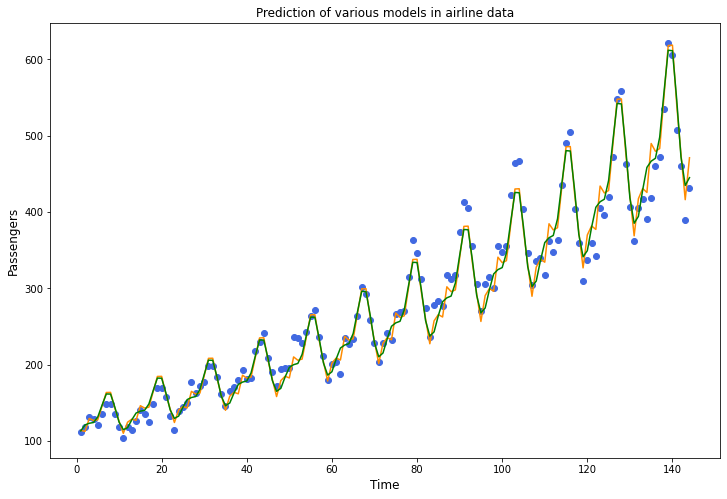

In [14]:
# plotting predicion value and real value about 
fig = plt.figure(figsize=(12,8))
plt.scatter(airline_data['t'], airline_data['passengers'], color='royalblue')
plt.plot(binary_airline_data['t'], pred_binary_airline, color='darkorange')
plt.plot(airline_data['t'], pred_tri_2_airline, color='g')
plt.title('Prediction of various models in airline data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Passengers', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

In [15]:
def MAD(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [16]:
# caluate a MAD(MAE)
mad_bin = MAD(airline_data['passengers'], pred_binary_airline )
print(f'MAD of binary variables models = {mad_bin:.2f}')
mad_tri_2 = MAD(airline_data['passengers'], pred_tri_2_airline)
print(f'MAD of trigonometric models (2)  = {mad_tri_2:.2f}')

MAD of binary variables models = 12.89
MAD of trigonometric models (2)  = 14.69


In [17]:
# caluate a MSE
mse_bin = MSE(airline_data['passengers'], pred_binary_airline )
print(f'MSE of binary variables models = {mse_bin:.2f}')
mse_tri_2 = MSE(airline_data['passengers'], pred_tri_2_airline)
print(f'MSE of trigonometric models (2)  = {mse_tri_2:.2f}')

MSE of binary variables models = 279.83
MSE of trigonometric models (2)  = 371.54
